<a href="https://colab.research.google.com/github/gitcnk/Git-class-demo/blob/master/test0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Colab Notebooks for teaching R

This is a Jupyter notebook. It is similar to an Rmd notebook, but they can be used to run either Julia, Python or R. They were primarily developed for writing Python. Consequently, you write text and code into "cells", which can be thought of as sections of text blocks or code chunks in an .Rmd document 

**Cells** are markdown chunks, and so markdown tags and syntax can be used for text formatting. 

---



You can "click" through a Jupyter notebook by clicking Shift+Enter, which will execute the current cell and move the cursor to the next cell. Alternatively, to run a cell that contains code you can click on the "Play" button in the top left hand corner. When the code is running, you will see the "Play" button turn into a "Pause" button, which will allow you to stop the current cell while running. You can test this in the following code cell:

In [1]:
# In this cell we can write R code, which will be run on the Google Colab servers
a <- 2
print(a)

[1] 2


In our notebook we still have access to most useful UI functionality, such as code completion, warning and error messaging, plot visualisation and being able to install packages:

In [ ]:
# Example error
install.packages("ggplot2error")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot2error’ is not available (for R version 3.6.2)”


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



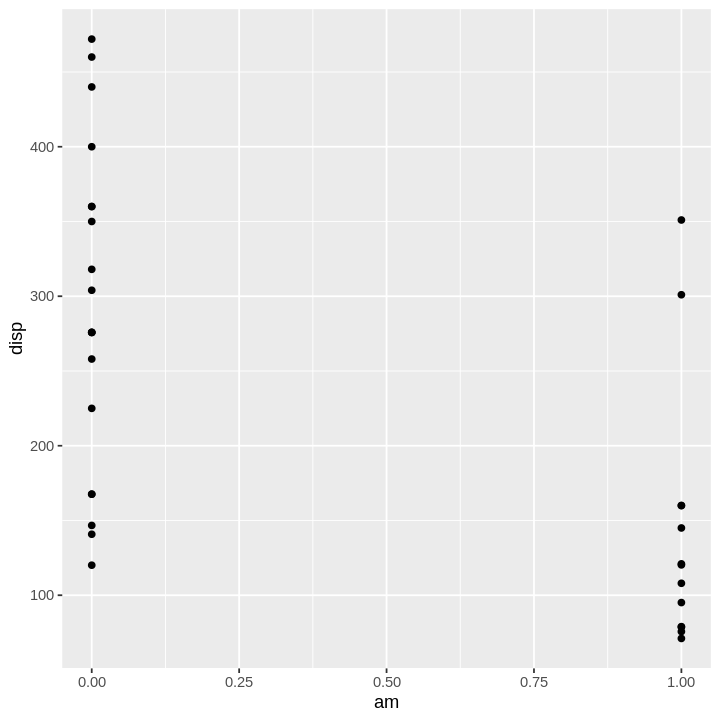

In [ ]:
# Example package installation and plotting
install.packages("ggplot2")
ggplot2::ggplot(mtcars, ggplot2::aes(x = am, y = disp)) + ggplot2::geom_point()

## Pros & Cons for Teaching

There are advantages and disadvantages to using Google Colab Jupyter notebooks for teaching purposes. The main 3 advantages personally all result from moving where the code is running from their laptops to the Cloud. These result in:

1. No issues associated with people running different versions of R or having to wait for people to download the required software.
1. No issues with different machine operating systems across each student's machines.
1. No concerns that individuals with have different machine capabilites that may cause delays when teaching code topics that require computation time. 
1. Sharing a notebook is very quick and easy. For example, you can embed an "Open in Colab" button at the top of your notebook, which allows people vieiwing the notebook on GitHub to instantly interact with the notebook.  

However, there are also a number of disadvantages, which relate to whether the Jupyter notebook is the most helpful format for teaching R. For example, I personally feel that Jupyter notebooks are bad for teaching R because:

1. They obscure much of how R works and do not introduce the user how to run R locally. 
2. They rely on an internet connection. 
3. They are not very intuitive (what is a cell? How do I run the code? Where is my output?) and explaining what is actually going on (your code is not running locally but in the cloud) can cause a lot of confusion. 

---


However, depending on the teaching format required they can be very helpful. For example, if you are teaching how to use a specific package or how to do a type of statistical modelling that requires a number of software requirements **and** you only have 2 hours, they are very useful. They enable users to quickly get to grips with the learning material, which is useful as it means you can spend more time answering questions about the topic rather than software set up etc. 


## Other issues with Colab

Although hosting the notebook in Google's servers is excellent for not having to worry about a user's runtime environment, it can cause teaching material that requires R packages to be downloaded to be slow for the user. Additionally, if the R package requries external libraries then these will need to be installed each time the notebook is loaded. For example, let's imagine you were teaching something that required **Stan**. You would need to run the following cell each time the notebook was loaded because Google Colab will give you a clean machine each time. 

In [ ]:
install.packages("rgl", repos = "http://cran.rstudio.com/")

system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



This may not be the best teaching approach if you have more time with the students as it does not require them to learn about installing external libraries. However, it does allow you to reliably allow each student to use Stan. 

In [ ]:
stanmodelcode <- "
data {
    int<lower=0> N; 
    real y[N];
}

parameters {
    real mu; 

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

Inference for Stan model: example.
8 chains, each with iter=2012; warmup=1006; thin=1; 
post-warmup draws per chain=1006, total post-warmup draws=8048.

       mean se_mean   sd   2.5%    25%    50%    75%  97.5% n_eff Rhat
mu     0.28    0.00 0.22  -0.16   0.12   0.27   0.43   0.71  3254    1
lp__ -31.51    0.01 0.69 -33.45 -31.67 -31.25 -31.07 -31.02  3317    1

Samples were drawn using NUTS(diag_e) at Mon Jan 20 10:41:19 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



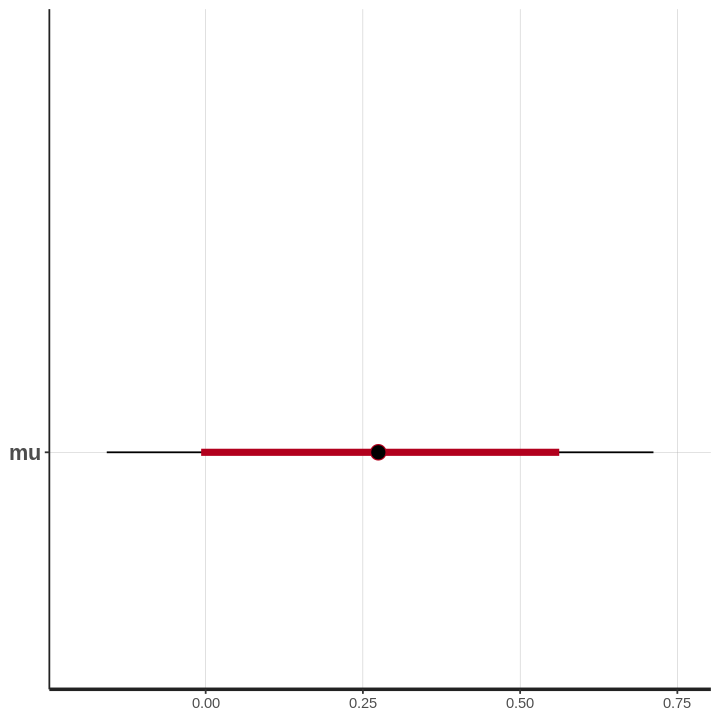

In [ ]:
plot(fit)

## Alternatives

1. Github Repo of .Rmd notebooks for users to download. 
2. Kaggle hosted notebooks. Very similar to Colab but with more packages installed by default and more system specs. For example, this notebook can be found at https://www.kaggle.com/ojwatson/jh-colab-demonstration. You also have the option in Kaggle of quickly **forking** the notebook to your own account for editing and running in the cloud. Similarly to Colab, Kaggle will come with its own pros and cons for teaching purposes that are similar to Colab, however, Colab has the additional pro in that it allows people to save to their own Google drive etc more easily. 